## Nama : Ahmad Jalu Fahreza Nur Hakim
## NIM  : H071201057

# Clasification

## 1. Read Data Set

Informasi Atribut
1. Age 20 - 65
2. Gender : 1. Male, 2. Female
3. Polyuria : 1.Yes, 2.No
4. Polydipsia : 1.Yes, 2.No
5. Sudden wWight loss : 1.Yes, 2.No
6. Weakness : 1.Yes, 2.No
7. Polyphagia : 1.Yes, 2.No
8. Genital thrush : 1.Yes, 2.No
9. visual blurring : 1.Yes, 2.No
10. Itching : 1.Yes, 2.No
11. Irritability : 1.Yes, 2.No
12. Delayed Healing : 1.Yes, 2.No
13. Partial Paresis : 1.Yes, 2.No
14. Muscle Sti
ness : 1.Yes, 2.No
15. Alopecia : 1.Yes, 2.No
16. Obesity : 1.Yes, 2.No
17. Class : 1.Positive, 2.Negative


Reference :


### 1.1 Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Menampilkan Data Set

In [4]:
data1 = pd.read_csv('Data/diabetes_data_upload.csv')
data1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### 1.3 Data Cleaning

In [5]:
# Mengubah data categorical menjadi numerik menggunakan label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data1.columns:
    if data1[column].dtype == type(object):
        data1[column] = le.fit_transform(data1[column])

In [24]:
data1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
data1.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### 1.4 Split Data

In [8]:
from sklearn.model_selection import train_test_split

x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

# Memisahkan dataset menjadi data training dan testing
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, random_state=42)
print('Jumlah data train:',len(x_train))
print('Jumlah data test :',len(x_test))

Jumlah data train: 416
Jumlah data test : 104


### 1.5 Visualisasi Data

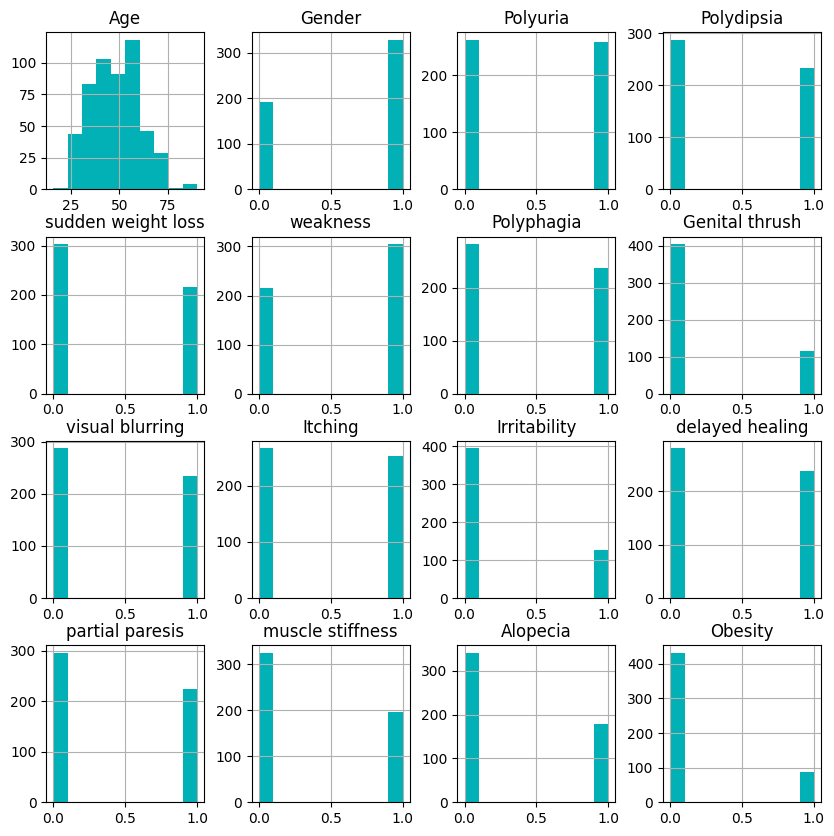

In [9]:
data1.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

In [10]:
Y = []
for i in pd.unique(y):
    Y.append(i)
    
nY = []
tmp0 = 0; #index#
for i in Y:
    nY.append(0)
    for j in y:
        if j == i:
            nY[tmp0] += 1    
    tmp0 += 1

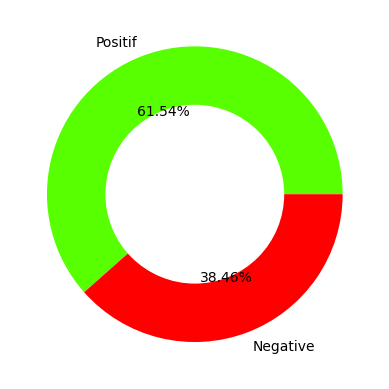

In [15]:
names = ['Positif', 'Negative']
marks = nY
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(marks, labels=names, autopct='%.2f%%', colors=['#57FF00', '#FF0000'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

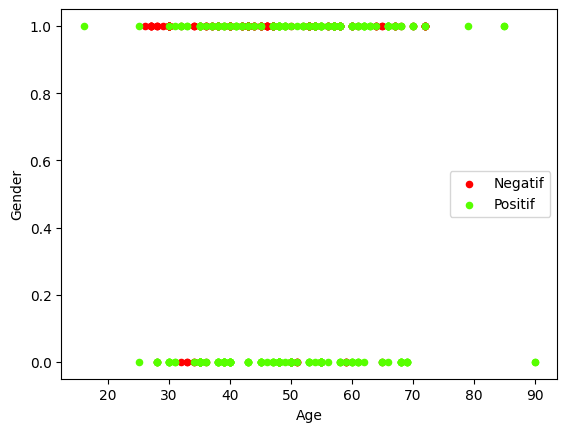

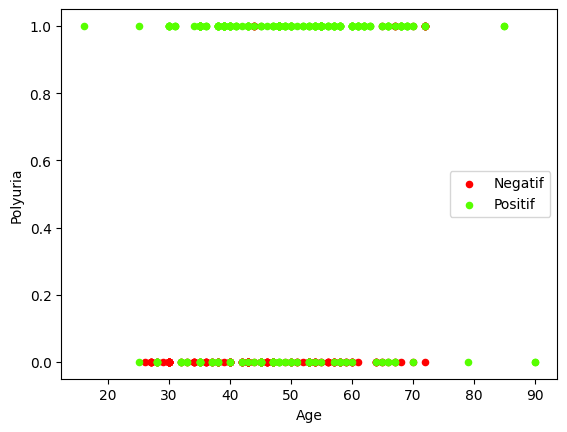

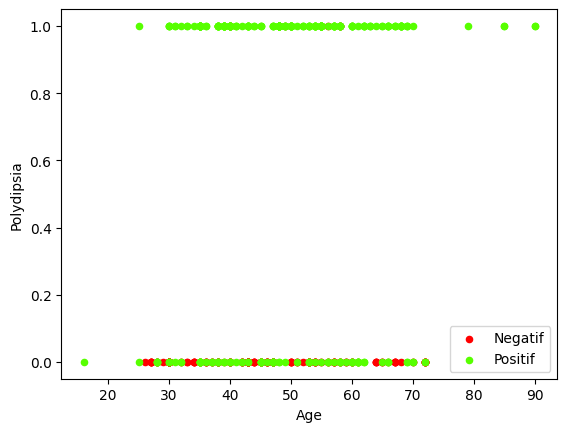

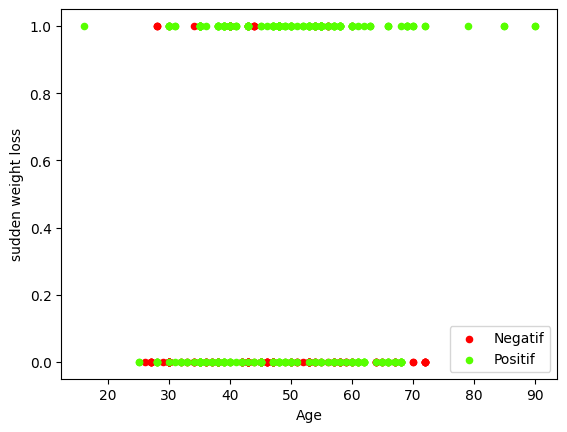

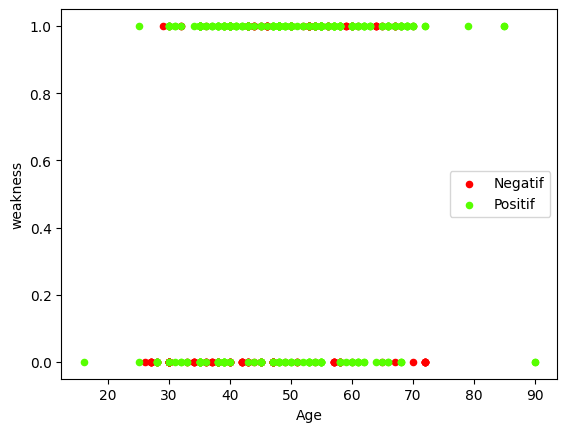

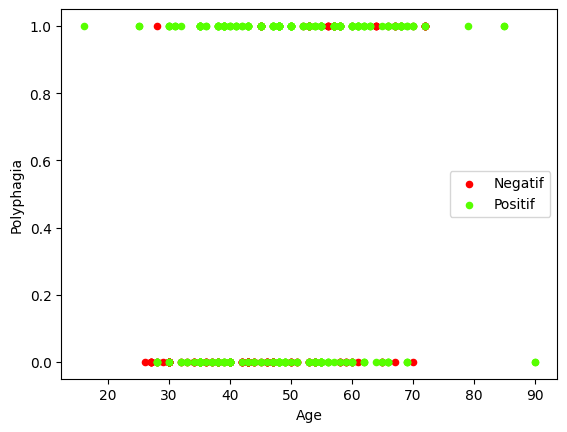

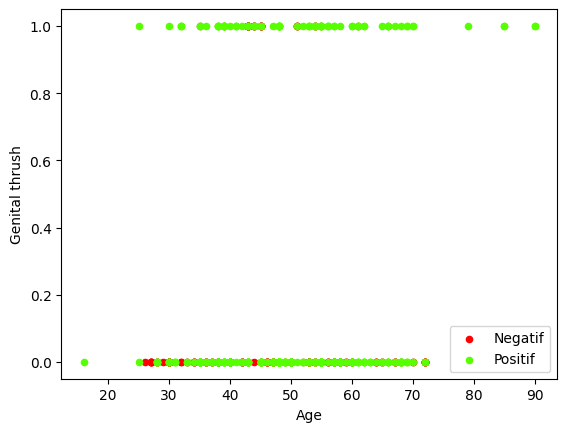

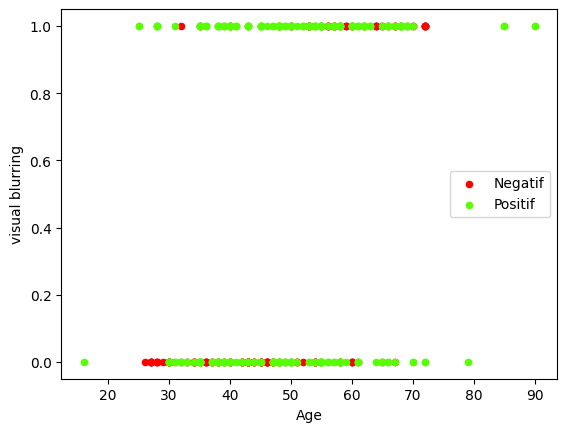

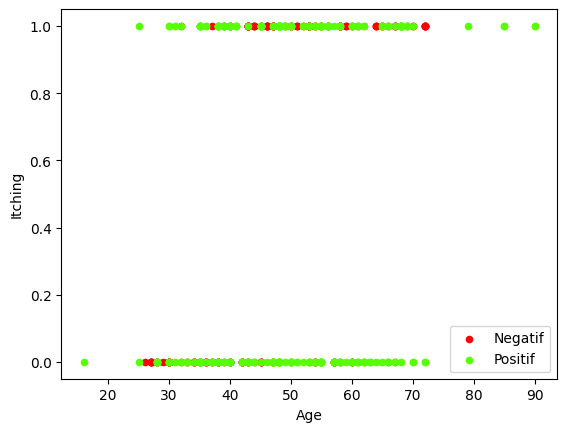

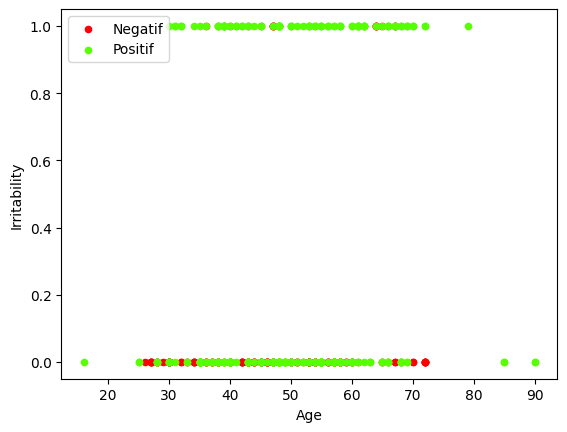

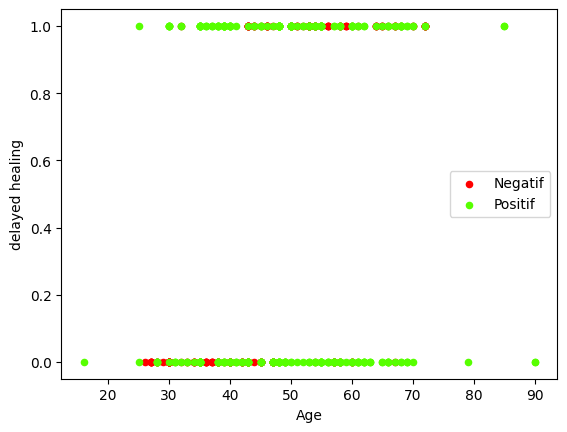

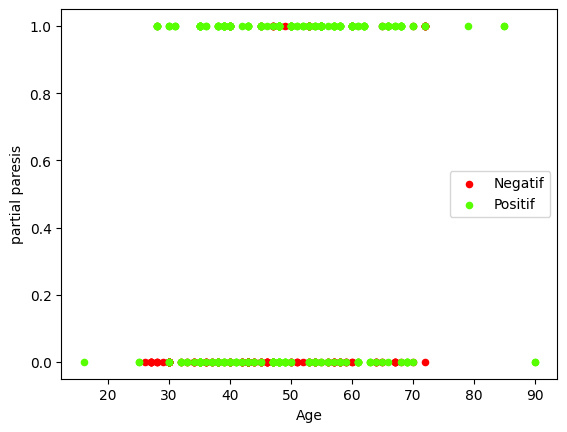

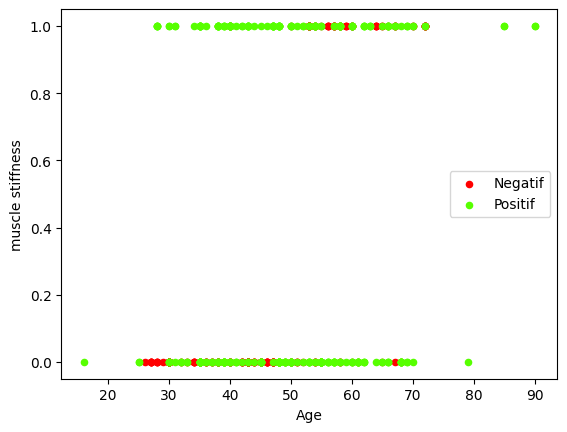

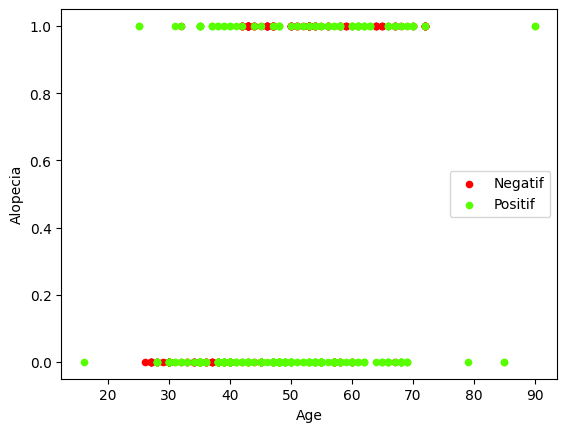

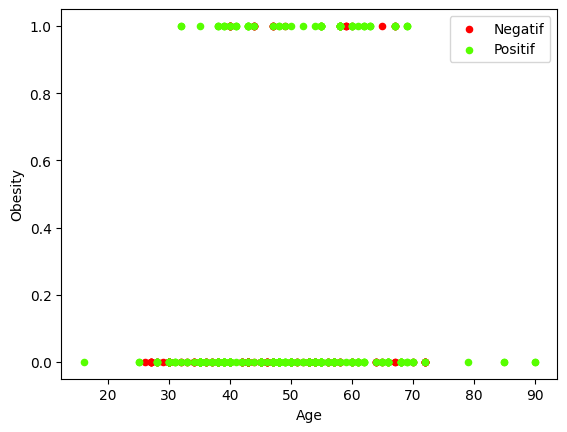

In [25]:
tmp0 = 0
for i in data1.columns:
    if (tmp0 > 0) and (tmp0 < len(data1.columns)-1):
        ax = data1[data1['class'] == 0].plot(kind='scatter',
                                                      x='Age', 
                                                      y=i,
                                                      color='#FF0000', 
                                                      label='Negatif');
        data1[data1['class'] == 1].plot(kind='scatter', 
                                                         x='Age', 
                                                         y=i, 
                                                         color='#57FF00', 
                                                         label='Positif', 
                                                         ax=ax);
        plt.show()
    tmp0 += 1

## 2. Metode Klasifikasi

### 2.1 Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = metrics.accuracy_score(y_test, knn_pred)

print('Akurasi Prediksi method K-NN : ',round(knn_acc,8), ' atau ',round(knn_acc*100,2),'%', sep='')

Akurasi Prediksi method K-NN : 0.85576923 atau 85.58%


In [ ]:
## Evaluasi model ##
k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    mean_acc.append(metrics.accuracy_score(knn_pred, y_test))
    std_acc.append(np.std(knn_pred == y_test)/np.sqrt(knn_pred.shape[0]))
    
mean_acc

[0.9134615384615384,
 0.875,
 0.875,
 0.8653846153846154,
 0.8557692307692307,
 0.7884615384615384,
 0.8173076923076923,
 0.75,
 0.7692307692307693]

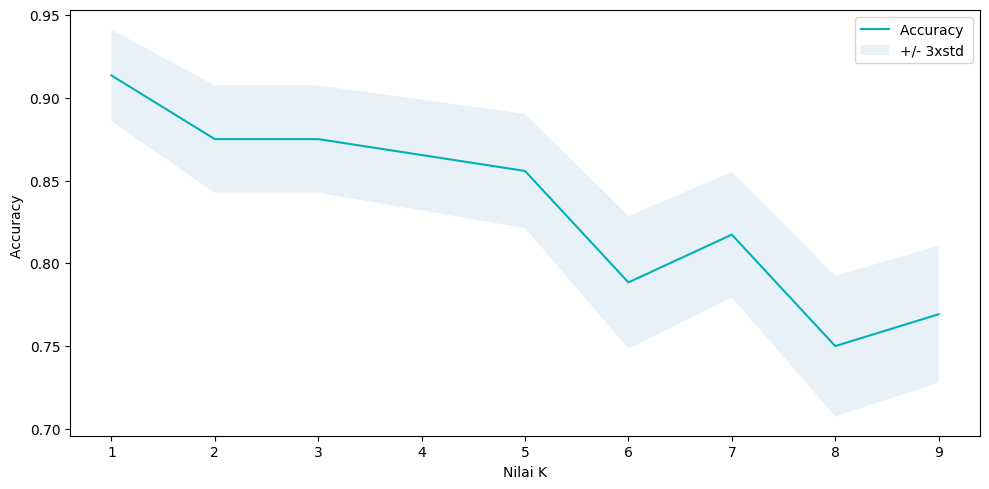

In [ ]:
## K-NN ##
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [ ]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='') 

Nilai Akurasi terbaik ada pada 91.35% dengan k = 1


### 2.2 Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
print('Akurasi Prediksi method Tree : ',round(dt_acc,8), ' atau ',round(dt_acc*100,2),'%', sep='')

Akurasi Prediksi method Tree : 0.97115385 atau 97.12%


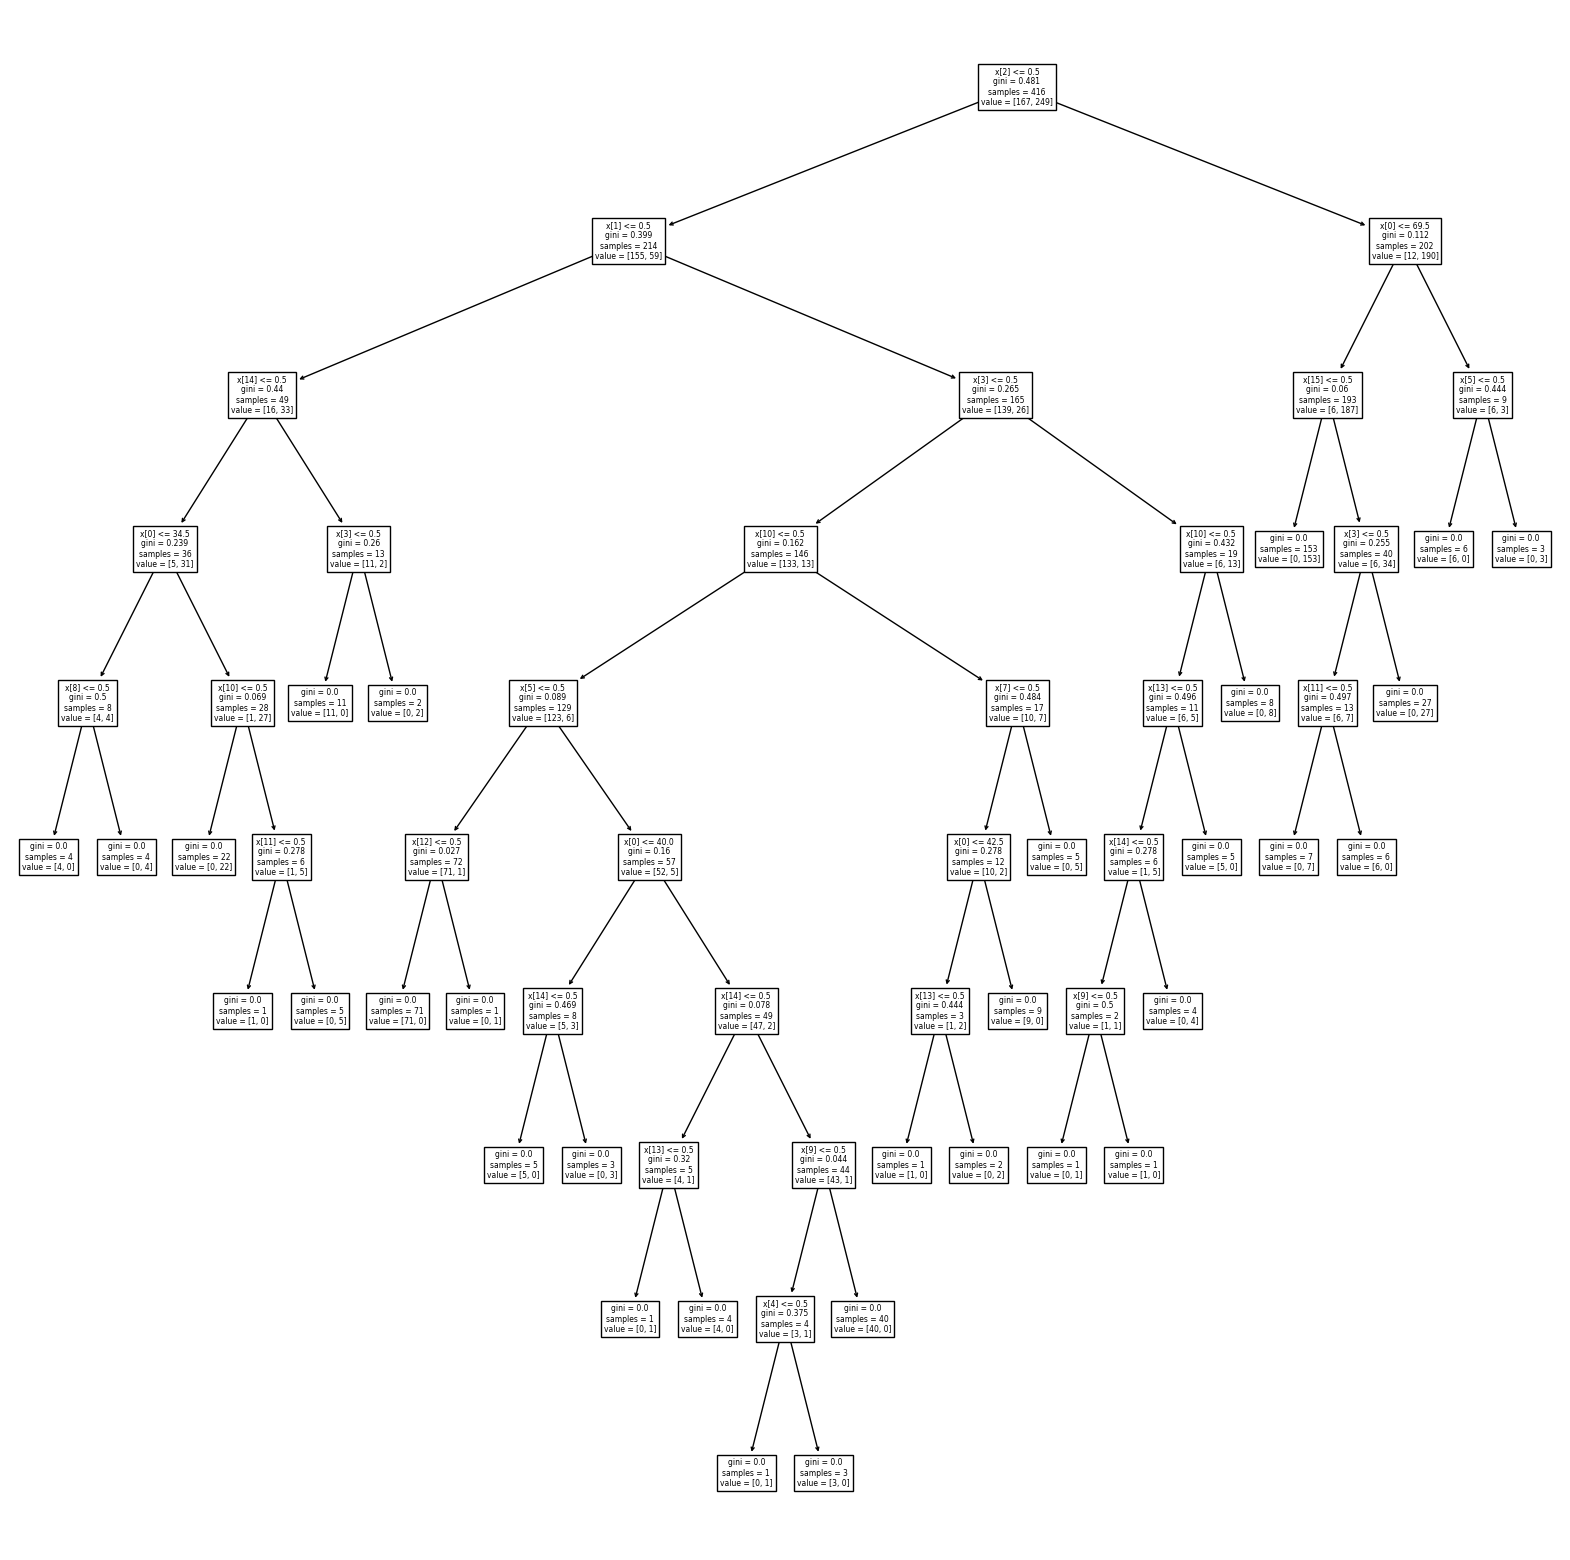

In [ ]:
## Evaluasi Model ##

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt)
plt.show()

### 2.3 Nive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_acc = metrics.accuracy_score(y_test, nb_pred)
print('Akurasi Prediksi Bayes : ',round(nb_acc,8), ' atau ',round(nb_acc*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.91346154 atau 91.35%


## 3. Akusisi Data

### 3.1 Confusion Matrix

In [ ]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediksi", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

### 3.2 Confusin Matrix KNN

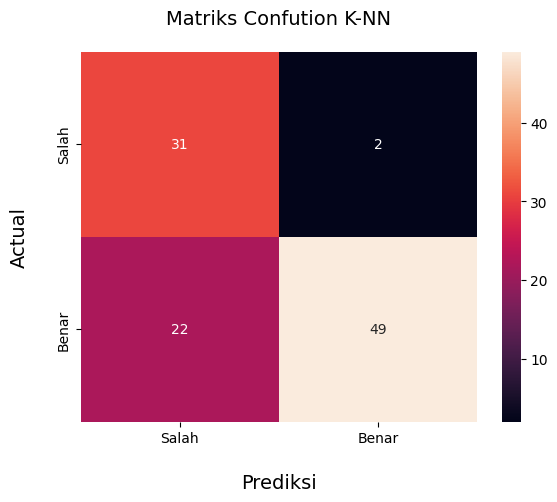

Hasil Confution Matriks :76.92%


In [ ]:
get_conf_matriks(y_test, knn_pred, title='Matriks Confution K-NN')

### 3.3 Confusin Matrix Decision Tree

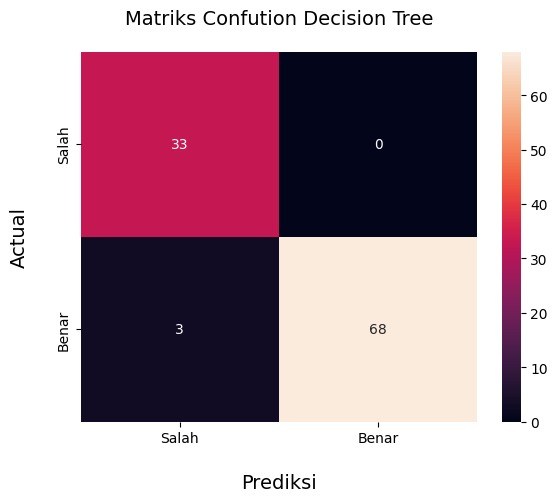

Hasil Confution Matriks :97.12%


In [ ]:
get_conf_matriks(y_test, dt_pred, title='Matriks Confution Decision Tree')

### 3.3 Confusion Matrix Nive Bayes

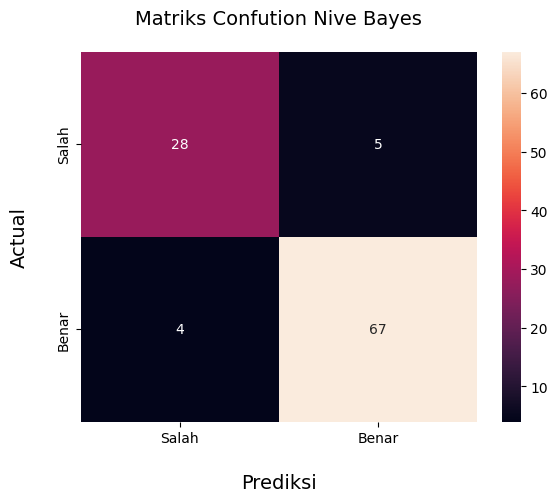

Hasil Confution Matriks :91.35%


In [ ]:
get_conf_matriks(y_test, nb_pred, title='Matriks Confution Nive Bayes')

## KESIMPULAN
Berdasarkan hasil training pada data diabetes_data_upload menggunakan tiga algoritma klasifikasi yang berbeda, dapat disimpulkan bahwa:


1.   K-Nearest Neighbors (KNN) memiliki akurasi sekitar 76%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 76% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma KNN mengklasifikasikan data berdasarkan jarak antara data uji dan data latih terdekat, sehingga cocok digunakan pada data yang memiliki karakteristik terdistribusi secara lokal.
2.   Decision Tree memiliki akurasi sekitar 97%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 97% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma Decision Tree bekerja dengan membuat pohon keputusan yang membagi data berdasarkan fitur yang paling penting dan menghasilkan kelas prediksi pada daun pohon tersebut. Algoritma ini cocok digunakan pada data yang memiliki karakteristik dengan banyak fitur.
3.   Naive Bayes memiliki akurasi sekitar 91%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 91% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma Naive Bayes menggunakan teorema Bayes dan mengasumsikan bahwa setiap fitur independen secara statistik, sehingga cocok digunakan pada data yang memiliki banyak fitur.


